# SLU04 - Basic Stats with Pandas: Examples notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from utils import prepare_dataset, get_company_salaries_and_plot, \
    plot_log_function

In [2]:
# Some global plot configurations
plt.rc('figure', dpi=200)  # Resolution
plt.rc('font', size=5, family='serif')   # Font size and family
plt.rc('axes', titlesize=7, labelsize=6, facecolor='white')  # Some axes 
                                                             # properties
plt.rc('lines', linewidth=1, color='blue')  # Some line properties

In [3]:
lego = pd.read_csv('data/sets.csv')

## Count

In [4]:
lego.count()

set_num      11673
name         11673
year         11673
theme_id     11673
num_parts    11673
dtype: int64

## Max, idxmax, min, idxmin 

In [5]:
lego.num_parts.max()

np.int64(5922)

In [6]:
lego.num_parts.idxmax()

170

In [7]:
lego.loc[lego.num_parts.idxmax(), 'set_num']

'10189-1'

In [8]:
lego.num_parts.idxmin()

1683

In [9]:
lego.num_parts.min()

np.int64(-1)

In [10]:
lego = lego.drop(lego.loc[lego.num_parts == lego.num_parts.min()].index, 
                 axis=0)

## Mode

In [11]:
lego.year.mode()  # seems like 2014 was the year where more sets were published

0    2014
Name: year, dtype: int64

# Mean and Median

In [12]:
lego.num_parts.mean()  # In terms of code, it's as simple as this. We have a 
                       # mean of 162 numbers of parts.

np.float64(162.3043701799486)

In [13]:
lego.num_parts.median()  

np.float64(45.0)

## Skewness

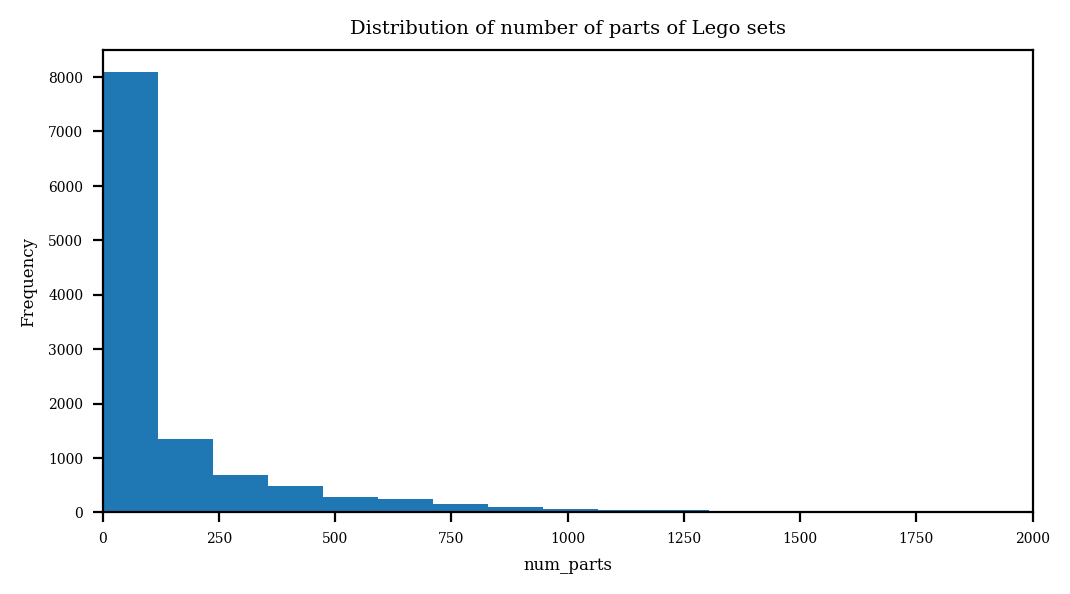

In [14]:
lego.num_parts.plot.hist(bins=50, figsize=(6, 3))
plt.xlim(0,2000)
plt.xlabel('num_parts')
plt.title('Distribution of number of parts of Lego sets');

In [15]:
lego.num_parts.skew()

np.float64(5.7704793806916514)

## Standard Deviation and Variance

In [16]:
print('Mean:               %0.2f' % lego.num_parts.mean())
print('Variance:           %0.2f' % lego.num_parts.var())
print('Standard Deviation: %0.2f' % lego.num_parts.std())

Mean:               162.30
Variance:           109048.00
Standard Deviation: 330.22


## Kurtosis

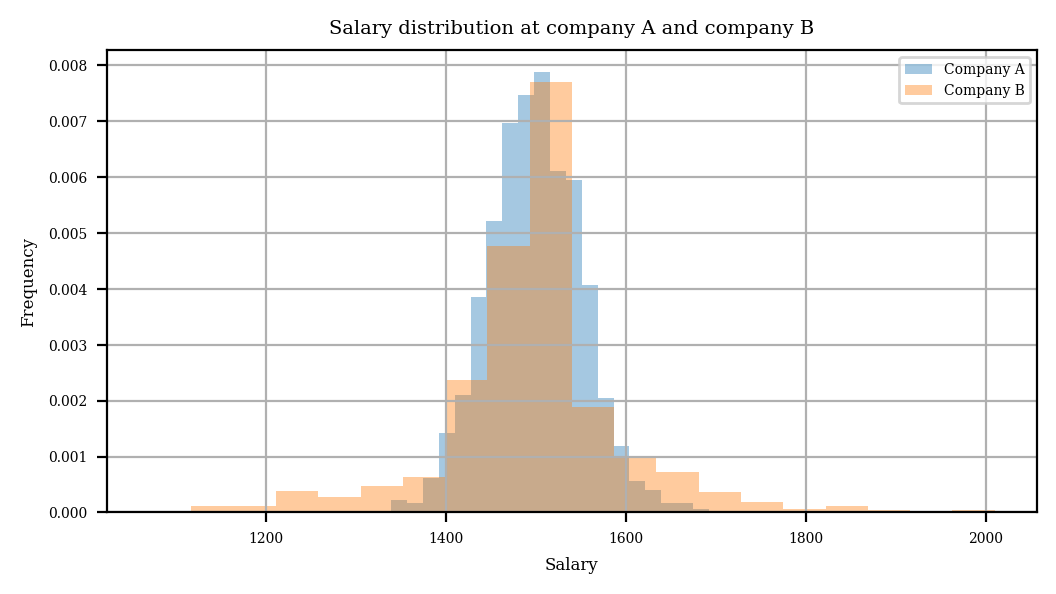

In [17]:
company_a, company_b = get_company_salaries_and_plot()

In [18]:
company_a.kurt()

np.float64(0.22420229095281652)

In [19]:
company_b.kurt()

np.float64(4.0409689366297314)

## Quantiles

In [20]:
quartiles = [.25, .5, .75]
lego.num_parts.quantile(q=quartiles)

0.25     10.0
0.50     45.0
0.75    172.0
Name: num_parts, dtype: float64

## Summarizing

In [21]:
lego.num_parts.describe()

count    11670.000000
mean       162.304370
std        330.224172
min          0.000000
25%         10.000000
50%         45.000000
75%        172.000000
max       5922.000000
Name: num_parts, dtype: float64

## Unique and nunique

In [22]:
lego.year.unique()

array([1970, 1978, 1987, 1979, 1976, 1965, 1985, 1968, 1999, 1967, 1969,
       2001, 1966, 2003, 2002, 2004, 2006, 2005, 2010, 2007, 2008, 2009,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 1977, 1983, 1986, 1984,
       1973, 1981, 2000, 1980, 1982, 1988, 1997, 1998, 1971, 1955, 1956,
       1957, 1958, 1974, 1972, 1975, 1992, 1991, 1989, 1990, 1993, 1994,
       1996, 1995, 1959, 1962, 1961, 1960, 1963, 1964, 1950, 1953, 1954])

In [23]:
lego.year.nunique()

66

In [24]:
lego.nunique()

set_num      11670
name         10367
year            66
theme_id       574
num_parts     1091
dtype: int64

## Dealing with outliers and skewed distributions

### Log transformation

In [25]:
lego_non_zero = lego.drop(lego.loc[lego.num_parts == 0].index, axis=0)

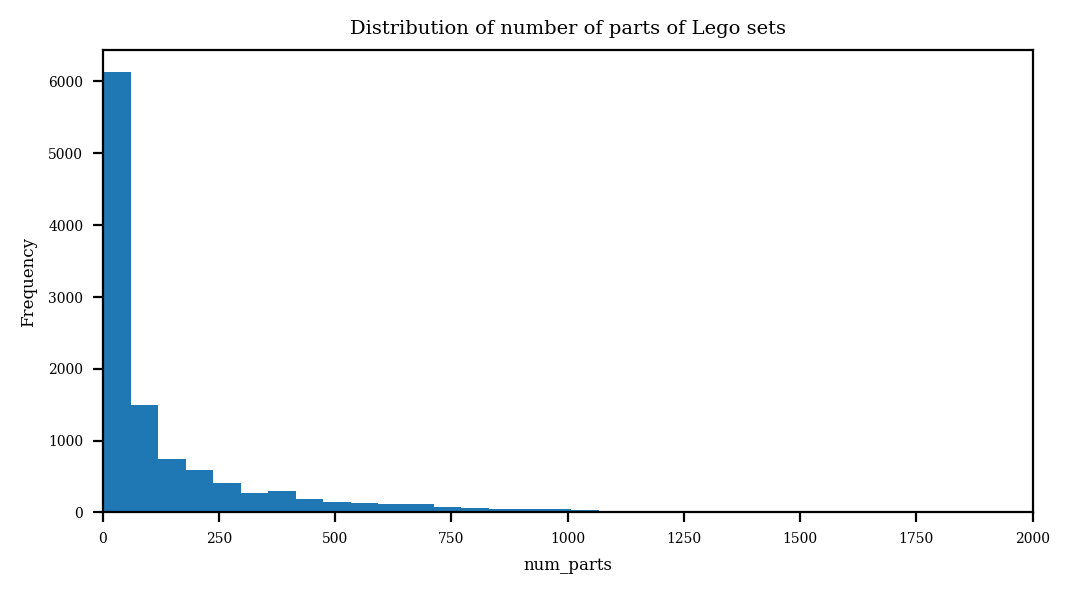

In [26]:
lego_non_zero.num_parts.plot.hist(bins=100, figsize=(6, 3))
plt.xlim(0,2000)
plt.xlabel('num_parts')
plt.title('Distribution of number of parts of Lego sets');

In [27]:
lego_non_zero['log_num_parts'] = np.log(lego_non_zero.num_parts)

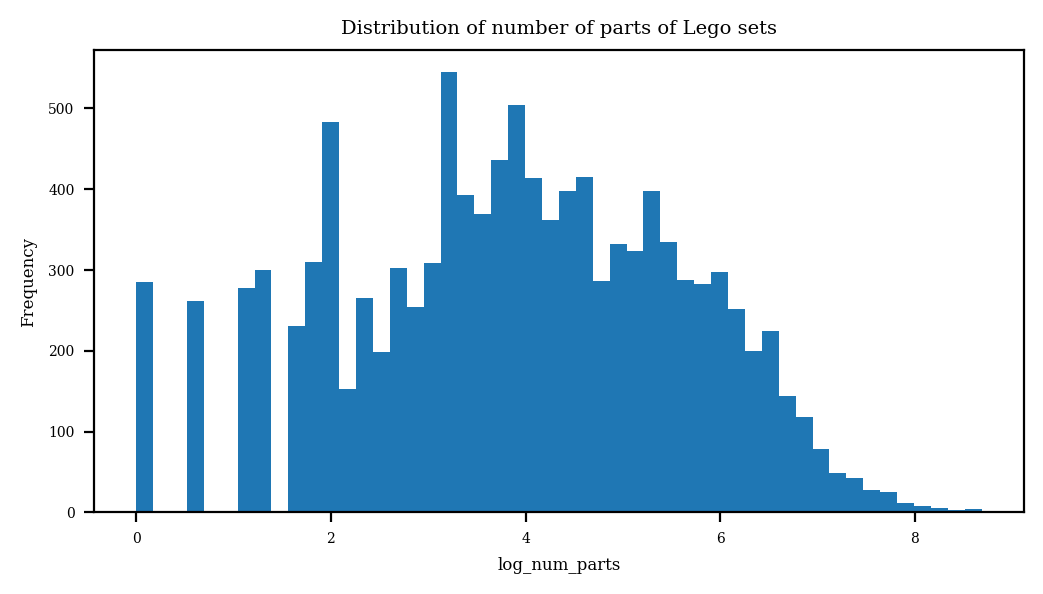

In [28]:
lego_non_zero.log_num_parts.plot.hist(bins=50, figsize=(6, 3))
plt.xlabel('log_num_parts')
plt.title('Distribution of number of parts of Lego sets');